In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Đọc dữ liệu
df = pd.read_csv('house_price_Dong_Da_Ha-Noi_subdata.csv')

# 5 dòng đầu
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


## Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

Biểu đồ phù hợp cho việc phân tích mối quan hệ giữa 2 biến là scatter plot

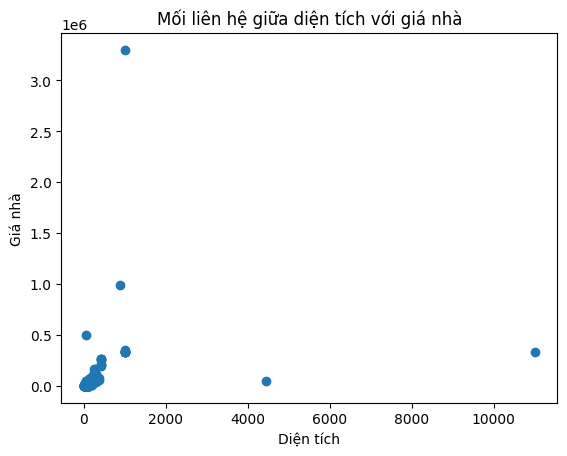

In [5]:
# Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà
plt.scatter(df['area'], df['price'])
plt.title('Mối liên hệ giữa diện tích với giá nhà')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')

plt.show()

Nhận xét:
- Giá nhà có xu hướng cao hơn với diện tích lớn hơn
- Có 2 trường hợp diện tích hơn nhưng giá nhà rẻ và 1 trường hợp diện tích nhỏ nhưng giá nhà cao. Nên tách riêng để kiểm chứng hoặc phân tích riêng

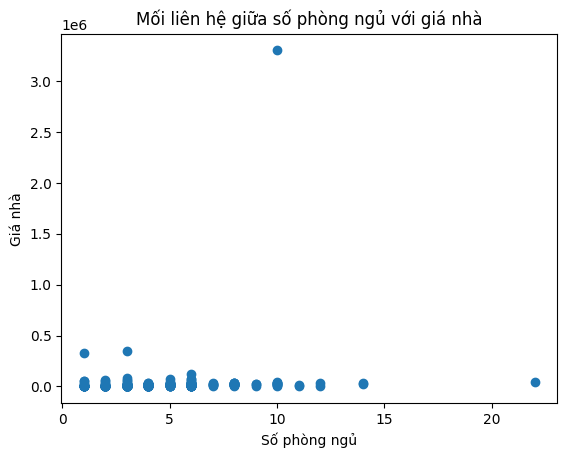

In [6]:
# Vẽ biểu đồ phân tích mối liên hệ giữa giữa số phòng ngủ với giá nhà
plt.scatter(df['bedroom'], df['price'])
plt.title('Mối liên hệ giữa số phòng ngủ với giá nhà')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá nhà')

plt.show()

Nhận xét:
- Nhìn chung giá nhà không tăng tỉ lệ thuận với số phòng ngủ. Phần lớp giá nhà rơi vào khoảng dưới 100 triệu đồng

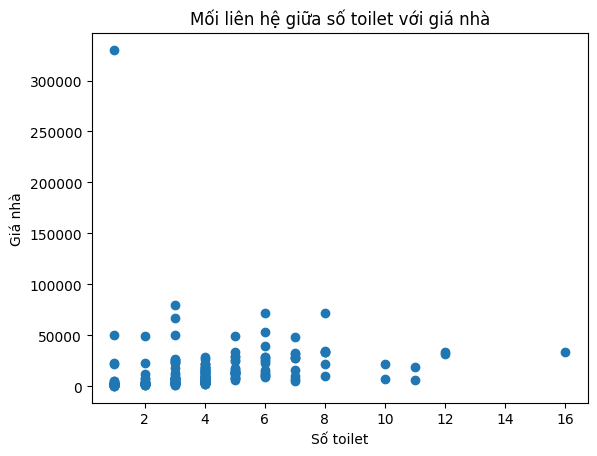

In [8]:
# Vẽ biểu đồ phân tích mối liên hệ giữa số toilet với giá nhà
plt.scatter(df['toilet'], df['price'])
plt.title('Mối liên hệ giữa số toilet với giá nhà')
plt.xlabel('Số toilet')
plt.ylabel('Giá nhà')

plt.show()

Nhận xét:
- Nhìn chung giá nhà cũng không tăng tỉ lệ thuận với số toilet

## Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).

In [9]:
df['property_type'].unique()

array(['trong ngo', 'mat pho'], dtype=object)

In [11]:
# Tính giá nhà trung bình trên 1 m2
df['price_per_m2'] = df['price'] / df['area']

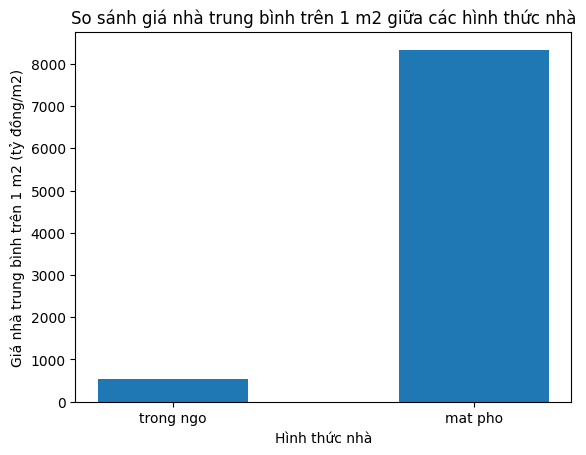

In [20]:
# vẽ bar chart để so sánh giá nhà trung bình giữa các hình thức nhà
plt.bar(df['property_type'], df['price_per_m2'], width=0.5)
plt.title('So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà')
plt.xlabel('Hình thức nhà')
plt.ylabel('Giá nhà trung bình trên 1 m2 (tỷ đồng/m2)')

plt.show()

Nhận xét:
- Giá nhà trung bình của nhà mặt phố cao hơn hẳn so với giá nhà trong ngõ

## Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

In [26]:
# Tìm số nhà trong ngõ
nha_ngo = df['property_type'].value_counts().get('trong ngo', 0)
print(nha_ngo)

449


In [25]:
# Đếm tổng số nhà
total_houses = df['property_type'].count()
total_houses

671

In [37]:
# Tính % từng loại nhà
phan_tram_nha_ngo = nha_ngo/total_houses * 100
phan_tram_nha_mat_pho = 100 - phan_tram_nha_ngo

print(phan_tram_nha_mat_pho)


33.084947839046194


In [67]:
# tạo bảng
data1 = {
    'property_type': ['nhà ngõ', 'mặt phố'],
    '%': [phan_tram_nha_ngo, phan_tram_nha_mat_pho]
}
df1 = pd.DataFrame(data1).reset_index(drop=True)
df1

,property_type,%
0,nhà ngõ,66.915052
1,mặt phố,33.084948


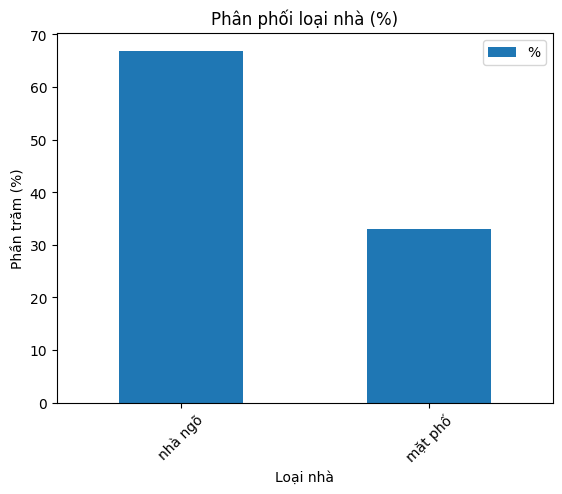

In [68]:
# Vẽ biểu đồ thể hiện tỉ lệ % giữa các loại nhà
df1.plot(x = 'property_type', y = '%', kind = 'bar')
plt.title('Phân phối loại nhà (%)')
plt.xlabel('Loại nhà')
plt.ylabel('Phần trăm (%)')
plt.xticks(rotation=45) # x tick label xoay 45 độ cho dễ nhìn

plt.show()

## Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ

In [63]:
# Tính giá nhà trung bình trên 1m2 theo số lượng phòng ngủ
average_price_per_m2_by_bedroom = df.groupby('bedroom')['price_per_m2'].mean()


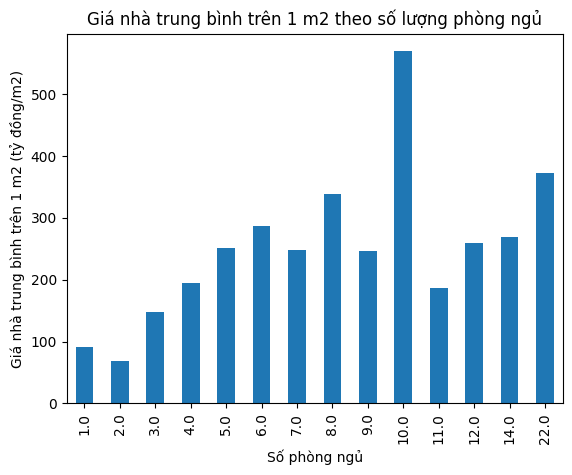

In [64]:
# vẽ line chart để thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ
average_price_per_m2_by_bedroom.plot(kind='bar')
plt.title('Giá nhà trung bình trên 1 m2 theo số lượng phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá nhà trung bình trên 1 m2 (tỷ đồng/m2)')

plt.show()

Nhận xét:
- Từ 2 đến 8 phòng ngủ, giá nhà trung bình trên m2 có xu hướng tăng theo số phòng ngủ nhiều hơn nhưng sau đó giảm khi tới 11 phòng ngủ rồi lại tăng. Cá biệt nhà có 10 phòng ngủ có giá nhà trung bình trên m2 cao nhất